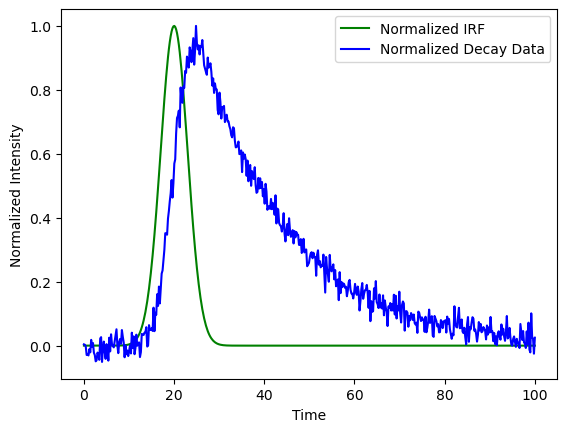

[[Model]]
    Model(model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 500
    # variables        = 2
    chi-square         = 0.20319204
    reduced chi-square = 4.0802e-04
    Akaike info crit   = -3900.10592
    Bayesian info crit = -3891.67670
    R-squared          = 0.99140477
[[Variables]]
    amplitude:  0.99603330 +/- 0.00473582 (0.48%) (init = 1)
    lifetime:   20.0701063 +/- 0.12718176 (0.63%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, lifetime) = -0.7598


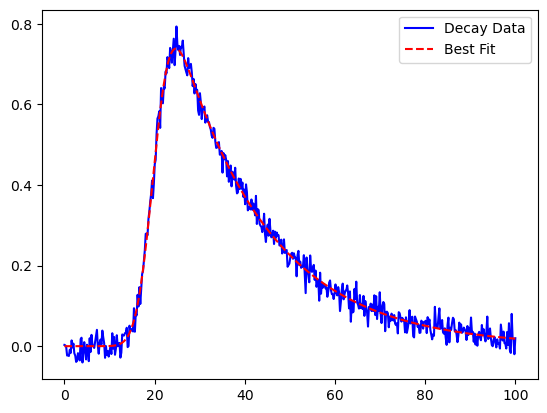

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifetime_spectro_recon_analysis import reconvolution_fit, irf_convolution, decay_model, gaussian_irf

# Simulated data for testing
t = np.linspace(0, 100, 500)
t0 = 20  # Center of the Gaussian IRF
width = 3  # Width of the Gaussian IRF
irf = gaussian_irf(t, t0, width)
irf /= np.sum(irf)  # Normalize IRF

# Initial parameters
initial_params = {'amplitude': 1.0, 'lifetime': 20.0}

# Simulate decay data (convolve true decay with IRF)
true_params = {'amplitude': 1.0, 'lifetime': 20.0}
decay_data = irf_convolution(true_params, t, irf, decay_model) + np.random.normal(0, 0.02, len(t))

# Plot IRF and Decay Data
plt.plot(t, irf / np.max(irf), 'g', label='Normalized IRF')  # Normalize IRF for comparison
plt.plot(t, decay_data / np.max(decay_data), 'b', label='Normalized Decay Data')  # Normalize decay data for comparison
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Intensity')
plt.show()

# Fit the decay data
result = reconvolution_fit(t, decay_data, irf, initial_params)

# Print fitting results
print(result.fit_report())

# Plot the result
plt.plot(t, decay_data, 'b', label='Decay Data')
plt.plot(t, result.best_fit, 'r--', label='Best Fit')
plt.legend()
plt.show()
